# Beyond Proof of Concept, Setup your Data Science Project to Scale
### Nathaniel Jones, Data Scientist

### About this workshop/repository
The notebooks in this repo will be presented live as a workshop at the Transform 2021 conference (April 2021). To participate you can use binder and the code repo to have an interactive python environment. The material is aimed at being accessible to all skill levels. The goal is to present some general principles and techniques of project organization and design that will allow for increasing project size, colloboration, and complexity over time (applied to data science). The techniques that will be presented are not tied to any commercial software or programming language (even though the examples used will be in Python). 

Run the next cell to setup the notebook for the rest of lesson

# Part 1: Why do so many data science projects fail despite successful POCs?

We've all seen the presentations about how at x large company or worldwide 95%, 98%, 9x% of data science projects fail. The surprise in the figures is often the so many POCs show promising results early on, often more the 50% of efforts in these presentations almost never less than 20% show promise from the presentations I've seen like this. Often these figures are cited at conferences full of managers, executives, or scientists (other than data scientists). These presentations often include reasons for this, but, in my experience, the observations are shallow or too high level to really glean anything useful about what is driving the high failure rates of data science projects. So let's get real, what really causes promising data science projects to never reach their potential?

In [8]:
# Why did the projects you've seen fail??

"""
Feel free to jot some ideas down here!
"""



'\nFeel free to jot some ideas down here!\n'

In [3]:
"""
- Poor communication

- No testing/automation

- No redundancy/teamwork on a project

- POCs on a small asset adopt the asset's data style and process and then when scaling it explodes in complexity

- Complex, long code files that is difficult to add features or changes

- Multiple customers relying on the same lines of code
"""

"\n- Poor communication\n\n- No testing/automation\n\n- No redundancy/teamwork on a project\n\n- POCs on a small asset adopt the asset's data style and process and then when scaling it explodes in complexity\n\n- Complex, long code files that is difficult to add features or changes\n\n- Multiple customers relying on the same lines of code\n"

Hopefully you had some good thoughts and ideas from your own experience. Let's boil this down to 4 things that drive success (or failure) in these types of projects:

Successful projects:
- Put customer(s) in the drivers seat
- Plan for change and complexity and adopt development principles that enable long-term growth and change
- Work on projects as a team using source control
- Automate testing, integration, and deployment of their projects

I will not get into customer focus or CI/CD and testing today, but feel free to reach out after this if you want to discuss them. We will focus on the other two.

In [7]:
"""
Here are some reasons I've seen for project failure:

- No redundancy for projects, one or two people were in charge and 
they then left and no one is left to maintain and keep things going!

- Poor communication between the eventual users/customers of data science project and the team building it.
This leads to poor/no buy-in and a product that might not solve truly pressing business needs. Poor communication
can also lead to unreasonable expectations for what data science algorithms are capable of.

- The project focuses on a single area or asset and adopts that asset's conventions, data systems, etc. 
Then, when you go to scale up, data is formated different, missing, uses different systems, etc. The scale
up then drowns in technical debt as you try to patch in all the different assets' data systems and conventions.

- No automation/testing built in. This can cause huge problems because one you have people depending on system,
you can't change it if you can test the changes first without risking serious problems and downtime. Code that 
can't be tested can't be safely changed. Automated deployments can also save huge amounts of time when distributing
new updates/changes and is a must-do for large projects/teams.

- Multiple customers with differing goals/needs relying on the same lines of code to get what they want. This is
a recipe for infighting and problems.

- Code that is too large and complex to colloborate in as a team and complicated to change or add features to.

"""

"\nHere are some reasons I've seen for project failure:\n\n- No redundancy for projects, one or two people were in charge and \nthey then left and no one is left to maintain and keep things going!\n\n- Poor communication between the eventual users/customers of data science project and the team building it.\nThis leads to poor/no buy-in and a product that might not solve truly pressing business needs. Poor communication\ncan also lead to unreasonable expectations for what data science algorithms are capable of.\n\n- The project focuses on a single area or asset and adopts that asset's conventions, data systems, etc. \nThen, when you go to scale up, data is formated different, missing, uses different systems, etc. The scale\nup then drowns in technical debt as you try to patch in all the different assets' data systems and conventions.\n\n- No automation/testing built in. This can cause huge problems because one you have people depending on system,\nyou can't change it if you can test the

#### Complexity and Productivity in Data Science Projects:

This is an illustration of the long term progress of a project with poor management of technical debt:
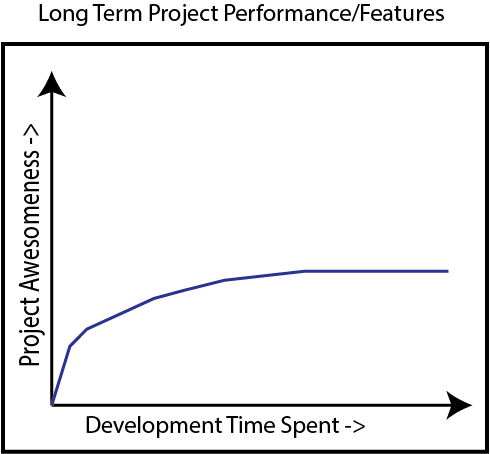



This is a project that is using good architecture, but is still accumulating technical debt over time:
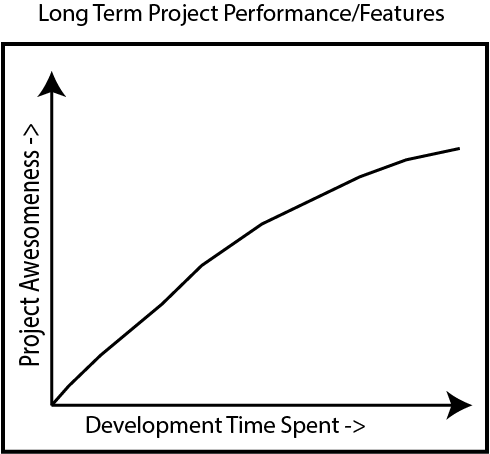

This is a project that is paying off technical debt as they go with strong architecture, testing, and automation practices:
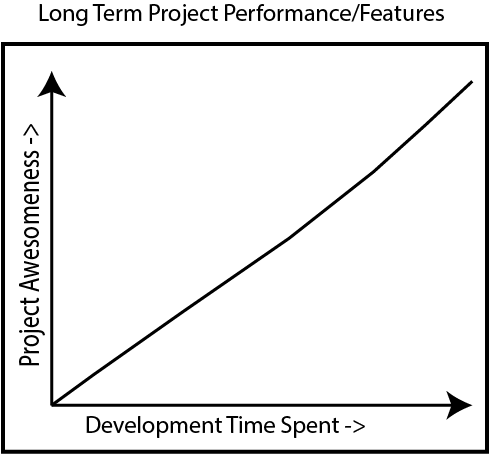

### Principles for managing complexity (and change!)

If you have worked on any larger projects using coding you've probably encountered 'agile' methods or engaged in the quality vs speed debates. There are genuine trade-offs and tension between the desire to move fast and the drive to make a quality program, but there are many times where this trade-off masks the true choice which is too apply good design principles or to ignore them. The insane thing about this is that good design practices rarely takes more time or effort initially than bad ones (there are exceptions), but the long term impact on technical debt, agility, and time spent on a project can be massive. So what is good design in code and data science projects? There's an acronym for it proposed by Robert C Martin: SOLID

- **S**ingle Responsibility Principle
- **O**pen/Closed Principle
- **L**iskov Substitution Principle
- **I**nterface Segregation Principle
- **D**ependancy Inversion Principle

Let's go through each of these and look at some examples of how apply them in your data science projects/pipelines so that they can scale up from the POC stage!

#### Single Responsibility Principle

This design principle is one of code and code file cohesion. At a small scale a function should do one and only one thing, if you have functions over 20 lines or so, you probably have functions doing too many things at once (break them up!). It also relates to code files (often called modules). Code files should only have resposibility over one area of your project at a time and should serve the needs of one customer, stakeholder, actor, etc. You should never have a code file extending beyond 300 lines or so (except in really rare carefully thought out circumstances) and if you do, you are probably violating this principle in some way.

In [4]:
# Function that violates the SRP, note this function is for illustration purposes only:
import pandas as pd
def load_and_clean_up_the_picks_from_a_folder(picks_folder):
    picks_tables = []
    for file in picks_folder:
        picks_tables.append(pd.read_csv(file))
    all_the_picks = pd.concat(picks_tables)
    all_the_picks = remove_duplicates(all_the_picks)
    all_the_picks = use_surveys_to_get_pick_positions(all_the_picks)
    all_the_picks = find_open_picks(all_the_picks)
    return all_the_picks

# Let's make a function that uses SRP out of the one above:
    

#### Open/Closed Principle

The open-closed principle is that code should be closed to modification, but open to extension. This is a key idea to understand for a long running project where you need to be able to grow, develop, and add new features without negatively impacting your existing deployed 'product' or customers. This is one of the major topics for the workshop and we will discuss this principle in detail soon.

#### Liskov Substitution Principle

I won't any of our limited time on this one today, it is good to be aware of it though so I invite you to look it up online.

#### Interface Segregation Principle

The idea behind this principle is that you should expose different 'interfaces' to customers with differing interests in the same group of data/methods. An example in an oil company setting could be production data and associated methods. A reservoir engineer might have different needs for the data than a person in production accounting. They both are probably different than someone working in the land department. All of their interests might be different from a manager or executive looking at the data who is also different than a person in the regulatory department. If you don't represent these distinct interests as distinct 'interfaces' in your code base then chaos and unhappiness can ensue. Imagine in our production data scenario that we have a called 'report_total_production_by_month_for_field': 

In [ ]:
# This is the function written for the production accounting group
def report_total_production_by_month_for_field(field):
    field_prod = get_prod(field)
    result = aggregate_to_reservoir_account_code(field_prod)
    return result

As you look at the above function can you see the complexity and chaos that will consume our straightforward function if we try to make EVERYONE happy with the same function?? Everyone wants specific and different things from this function and trying to satisfy everyone will either force ugly compromises or turn the function into a monstrously complex mess. The solution, fortunately, is pretty simple. The various parties can share the data, but they should each have an 'interface' or set of functions that serve them and them alone.

#### Dependancy Inversion Principle

This is the big one, and the principle I most hope to drive home to everyone today. It is the topic of the next notebook so let's jump right in!